### Análise de dados com dados fornecidos pelo data hackers

Dados da pesquisa realizada pelo data hackers e disponibilizada no Kaggle com dados coletados de cientistas de dados de diversas regioes brasileiras a fim de entender melhor a realidade dos profissionais de ciencia de dados no Brasil.

link com o dataset: https://www.kaggle.com/datahackers/pesquisa-data-hackers-2019?select=datahackers-survey-2019-anonymous-responses.csv

In [1]:
# import dos modulos
import pandas as pd
import numpy as np
import matplotlib.pyplot as plot
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


### Carga dos dados

In [2]:
# Carregando os dados
data = pd.read_csv("dataHackers.csv", sep = ",")

In [3]:
# Verificando o numero de registros
data.shape

(1765, 170)

In [4]:
data.dtypes

('P0', 'id')                           object
('P1', 'age')                         float64
('P2', 'gender')                       object
('P3', 'living_in_brasil')              int64
('P5', 'living_state')                 object
                                       ...   
('D2', 'origin_macroregion')           object
('D3', 'anonymized_degree_area')       object
('D4', 'anonymized_market_sector')     object
('D5', 'anonymized_manager_level')     object
('D6', 'anonymized_role')              object
Length: 170, dtype: object

In [5]:
# Resumo estatistico das variavies numericas
data.describe()

,"('P1', 'age')","('P3', 'living_in_brasil')","('P6', 'born_or_graduated')","('P13', 'manager')","('P19', 'is_data_science_professional')","('P20', 'linear_regression')","('P20', 'logistic_regression')","('P20', 'glms')","('P20', 'decision_tree')","('P20', 'random_forest')",...,"('P34', 'coursera')","('P34', 'udemy')","('P34', 'height')","('P34', 'edx')","('P34', 'data_camp')","('P34', 'data_quest')","('P34', 'kaggle_learn')","('P34', 'online_courses')","('P34', 'other')","('P36', 'draw_participation')"
count,1741.000000,1765.000000,1731.000000,1527.000000,1765.000000,1765.000000,1765.000000,1765.000000,1765.000000,1765.000000,...,1765.000000,1765.000000,1765.000000,1765.000000,1765.000000,1765.000000,1765.000000,1765.000000,1765.000000,1761.000000
mean,29.800689,0.980737,0.810514,0.199738,0.518414,0.296884,0.230028,0.075921,0.249858,0.203399,...,0.392635,0.637394,0.170538,0.166572,0.222096,0.036261,0.179037,0.095184,0.134844,0.813174
std,6.595795,0.137488,0.392007,0.399934,0.499802,0.457014,0.420970,0.264946,0.433054,0.402641,...,0.488475,0.480889,0.376212,0.372699,0.415773,0.186991,0.383492,0.293552,0.341654,0.389882
min,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,25.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,29.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,34.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,50.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [6]:
# Visualizando as primeiras linhas do dataset
data.head()

,"('P0', 'id')","('P1', 'age')","('P2', 'gender')","('P3', 'living_in_brasil')","('P5', 'living_state')","('P6', 'born_or_graduated')","('P8', 'degreee_level')","('P10', 'job_situation')","('P12', 'workers_number')","('P13', 'manager')",...,"('P34', 'other')","('P35', 'data_science_plataforms_preference')","('P35', 'other')","('P36', 'draw_participation')","('D1', 'living_macroregion')","('D2', 'origin_macroregion')","('D3', 'anonymized_degree_area')","('D4', 'anonymized_market_sector')","('D5', 'anonymized_manager_level')","('D6', 'anonymized_role')"
0,v9otv8j9wdvjrv9otvwnn9owhzq54ktv,37.0,Masculino,1,Minas Gerais (MG),1.0,Estudante de Graduação,Empregado (CTL),de 1 a 5,0.0,...,0,Nunca fiz cursos online,NaN,1.0,Região Sudeste,NaN,Computação / Engenharia de Software / Sistemas...,Outras,NaN,Outras
1,875ul998t0hqcv0871uptwf3oswcfv35,24.0,Feminino,1,São Paulo (SP),1.0,Estudante de Graduação,Empregado (CTL),Acima de 3000,0.0,...,1,NaN,Data Science Academy,0.0,Região Sudeste,NaN,Computação / Engenharia de Software / Sistemas...,Educação,NaN,Data Analyst/Analista de Dados
2,puscuk079vw1pusbb900pzw2xvpxtgdk,26.0,Masculino,1,São Paulo (SP),1.0,Graduação/Bacharelado,Empregado (CTL),Acima de 3000,0.0,...,0,Udemy,NaN,1.0,Região Sudeste,NaN,Outras Engenharias,Indústria (Manufatura),NaN,Outras
3,rmel8ewqpbffp2mnfbzermel8eqincov,21.0,Masculino,1,São Paulo (SP),0.0,Estudante de Graduação,Estagiário,de 11 a 50,0.0,...,0,Alura,NaN,1.0,Região Sudeste,Região Sudeste,Computação / Engenharia de Software / Sistemas...,Tecnologia/Fábrica de Software,NaN,Business Intelligence/Analista de BI
4,pj9mgud4d6mdct1l7vq0pj9mgu78h6ju,27.0,Masculino,1,NaN,1.0,Graduação/Bacharelado,Freelancer,de 6 a 10,1.0,...,0,Udemy,NaN,1.0,NaN,NaN,Computação / Engenharia de Software / Sistemas...,Internet/Ecommerce,"C-level (CDO, CIO, CTO)",NaN


In [7]:
# Verificando as colunas
data.columns

Index(['('P0', 'id')', '('P1', 'age')', '('P2', 'gender')',
       '('P3', 'living_in_brasil')', '('P5', 'living_state')',
       '('P6', 'born_or_graduated')', '('P8', 'degreee_level')',
       '('P10', 'job_situation')', '('P12', 'workers_number')',
       '('P13', 'manager')',
       ...
       '('P34', 'other')', '('P35', 'data_science_plataforms_preference')',
       '('P35', 'other')', '('P36', 'draw_participation')',
       '('D1', 'living_macroregion')', '('D2', 'origin_macroregion')',
       '('D3', 'anonymized_degree_area')',
       '('D4', 'anonymized_market_sector')',
       '('D5', 'anonymized_manager_level')', '('D6', 'anonymized_role')'],
      dtype='object', length=170)

In [8]:
# Verificando os valores nulos
data.isnull().any()

('P0', 'id')                          False
('P1', 'age')                          True
('P2', 'gender')                       True
('P3', 'living_in_brasil')            False
('P5', 'living_state')                 True
                                      ...  
('D2', 'origin_macroregion')           True
('D3', 'anonymized_degree_area')       True
('D4', 'anonymized_market_sector')     True
('D5', 'anonymized_manager_level')     True
('D6', 'anonymized_role')              True
Length: 170, dtype: bool

### Análise dos dados

### Idade

In [9]:
# Analisando a idade
idade = data.iloc[:,1]
idade.head(10)

0    37.0
1    24.0
2    26.0
3    21.0
4    27.0
5    27.0
6    34.0
7    37.0
8    26.0
9    28.0
Name: ('P1', 'age'), dtype: float64

In [10]:
# Idade media dos entrevistados
idade.mean()

29.800689259046525

In [11]:
# Entrevistados mais velhos
idade.max()

50.0

In [12]:
# Entrevistados mais novos
idade.min()

18.0

In [13]:
# Amplitude da variavel idade
amplitude = idade.max() - idade.min()
amplitude

32.0

(array([119., 280., 338., 312., 235., 226.,  98.,  59.,  39.,  35.]),
 array([18. , 21.2, 24.4, 27.6, 30.8, 34. , 37.2, 40.4, 43.6, 46.8, 50. ]),
 <a list of 10 Patch objects>)

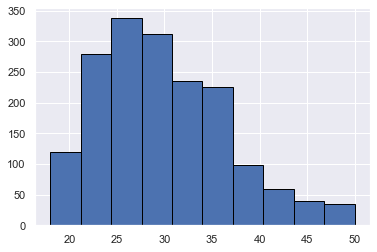

In [80]:
# Distribuição da variavel
plot.hist(idade, edgecolor = "black")

#### É possivel observar que grande maioria dos participantes tem entre 21 e 37 anos

### Genero

In [15]:
# Obtendo os dados sobre o genero
genero = data.iloc[:,2]

In [16]:
genero.head()

0    Masculino
1     Feminino
2    Masculino
3    Masculino
4    Masculino
Name: ('P2', 'gender'), dtype: object

In [17]:
# Verificando valores mising
genero.isna().values.any()

True

In [18]:
# Removendo os valores missing
genero.isna().sum() # 3 valores NA (como o numero e pequeno optei por eliminar)

3

In [19]:
genero.dropna(inplace = True)

In [20]:
genero.count()

1762

In [21]:
# Verificando se os valores mising foram eliminados
genero.isna().values.any()

False

In [22]:
# Verificando a distribuição dos dados - (Feminino|Masculino)
masculino = []
feminino = []
for valor in genero.values:
    if valor == "Masculino":
        masculino.append(valor)
    else:
        feminino.append(valor)

In [23]:
# porcentagem de distribuição de homens
mascPercent = (len(masculino) / genero.count())
print("Porcentagem de Homens:", round(mascPercent*100), "%")

Porcentagem de Homens: 81.0 %


In [24]:
# porcentagem de distribuição de mulheres
femPercent = (len(feminino) / genero.count())
print("Porcentagem de Mulheres:", round(femPercent*100), "%")

Porcentagem de Mulheres: 19.0 %


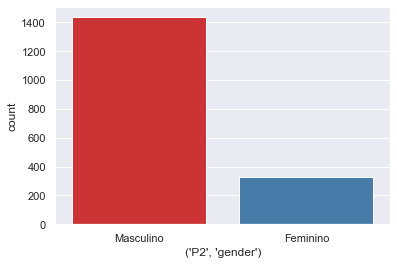

In [25]:
sns.set(style="darkgrid")
sns.countplot(genero, palette = "Set1")

### Estado de Origem

In [26]:
# Separando a coluna
estado_origem = data.iloc[:,4]
estado_origem.head()

0    Minas Gerais (MG)
1       São Paulo (SP)
2       São Paulo (SP)
3       São Paulo (SP)
4                  NaN
Name: ('P5', 'living_state'), dtype: object

In [27]:
# Numero de registros
estado_origem.count()

1428

In [28]:
# Verificando valores missing
estado_origem.isna().any()

True

In [29]:
# quantidade de valores missing
estado_origem.isna().sum()

337

In [30]:
# eliminando os valores missing
estado_origem.dropna(inplace = True)

In [31]:
# Verificando se os valores NA foram removidos
estado_origem.isna().sum()

0

In [32]:
# Verificando os estados - Temos 7 estados distintos
estado_origem.unique()

array(['Minas Gerais (MG)', 'São Paulo (SP)', 'Paraná (PR)',
       'Rio Grande do Sul (RS)', 'Rio de Janeiro (RJ)',
       'Espírito Santo (ES)', 'Santa Catarina (SC)'], dtype=object)

In [33]:
# Contagem por estado
estado_origem.value_counts()

São Paulo (SP)            669
Minas Gerais (MG)         316
Rio de Janeiro (RJ)       147
Paraná (PR)               117
Santa Catarina (SC)        83
Rio Grande do Sul (RS)     69
Espírito Santo (ES)        27
Name: ('P5', 'living_state'), dtype: int64

[Text(0, 0, 'São Paulo (SP)'),
 Text(0, 0, 'Minas Gerais (MG)'),
 Text(0, 0, 'Rio de Janeiro (RJ)'),
 Text(0, 0, 'Paraná (PR)'),
 Text(0, 0, 'Santa Catarina (SC)'),
 Text(0, 0, 'Rio Grande do Sul (RS)'),
 Text(0, 0, 'Espírito Santo (ES)')]

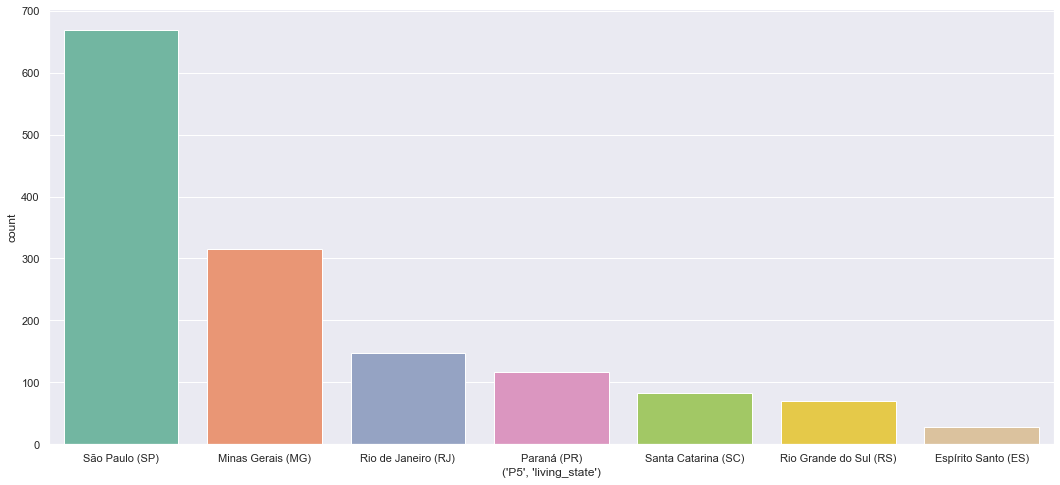

In [81]:
fig, ax = plot.subplots(figsize = (18, 8))
sns.set(style="darkgrid")
ax = sns.countplot(estado_origem, palette = "Set2", order = ["São Paulo (SP)", "Minas Gerais (MG)", "Rio de Janeiro (RJ)", 
                                                        "Paraná (PR)", "Santa Catarina (SC)", "Rio Grande do Sul (RS)",
                                                        "Espírito Santo (ES)"])

ax.set_xticklabels(ax.get_xticklabels())

In [35]:
estado_origem.value_counts("São Paulo (SP)")

São Paulo (SP)            0.468487
Minas Gerais (MG)         0.221289
Rio de Janeiro (RJ)       0.102941
Paraná (PR)               0.081933
Santa Catarina (SC)       0.058123
Rio Grande do Sul (RS)    0.048319
Espírito Santo (ES)       0.018908
Name: ('P5', 'living_state'), dtype: float64

### Nível de Ensino

In [36]:
nivel_ensino = data.iloc[:,6]
nivel_ensino.head()

0    Estudante de Graduação
1    Estudante de Graduação
2     Graduação/Bacharelado
3    Estudante de Graduação
4     Graduação/Bacharelado
Name: ('P8', 'degreee_level'), dtype: object

In [37]:
# Verificando valores NA
nivel_ensino.isna().sum()

0

In [38]:
# Verificando a contagem dos niveis de ensino
nivel_ensino.value_counts()

Graduação/Bacharelado         578
Pós-graduação                 527
Estudante de Graduação        374
Mestrado                      201
Doutorado ou Phd               50
Não tenho graduação formal     34
Prefiro não informar            1
Name: ('P8', 'degreee_level'), dtype: int64

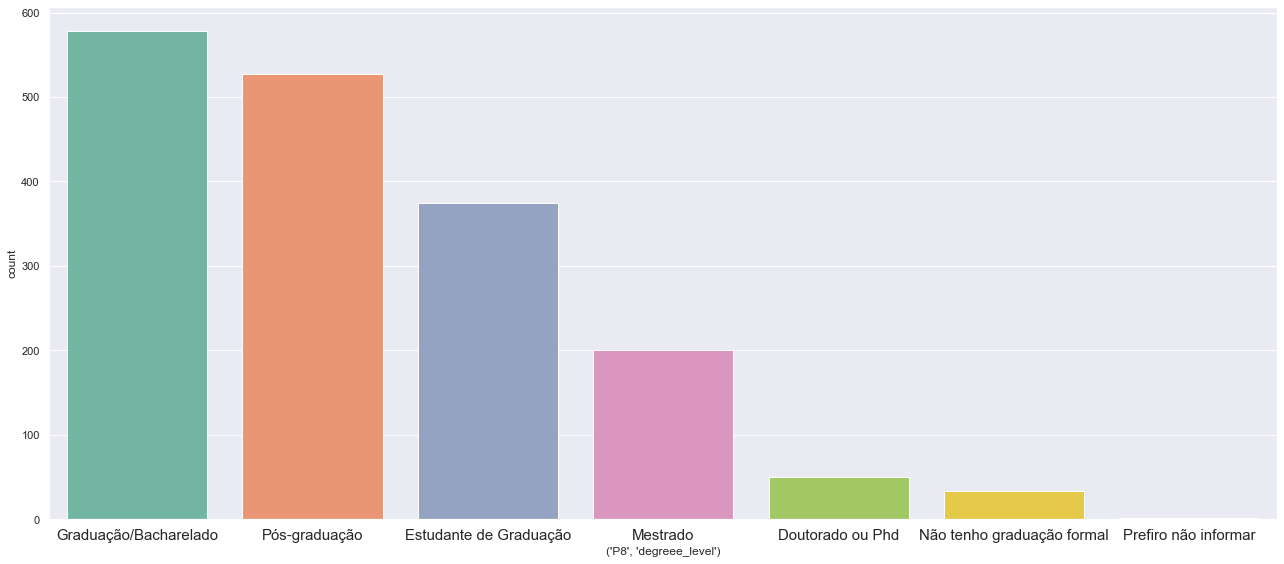

In [77]:
# plot de distribuição por nivel de ensino
fig, ax = plot.subplots(figsize = (18, 8))
ax = sns.countplot(nivel_ensino, palette = "Set2", order = ["Graduação/Bacharelado", "Pós-graduação", "Estudante de Graduação", 
                                                        "Mestrado", "Doutorado ou Phd", "Não tenho graduação formal",
                                                        "Prefiro não informar"])

ax.set_xticklabels(ax.get_xticklabels(), fontsize = 15)
plot.tight_layout()
plot.show()

### Faixa Salarial

In [40]:
salarios = data.iloc[:, 10]
salarios.head(20)

0       de R$ 1.001/mês a R$ 2.000/mês
1        de R$ 2.001/mês a R$ 3000/mês
2       de R$ 4.001/mês a R$ 6.000/mês
3       de R$ 1.001/mês a R$ 2.000/mês
4       de R$ 6.001/mês a R$ 8.000/mês
5       de R$ 3.001/mês a R$ 4.000/mês
6       de R$ 6.001/mês a R$ 8.000/mês
7      de R$ 8.001/mês a R$ 12.000/mês
8        de R$ 2.001/mês a R$ 3000/mês
9      de R$ 8.001/mês a R$ 12.000/mês
10      de R$ 4.001/mês a R$ 6.000/mês
11      de R$ 1.001/mês a R$ 2.000/mês
12    de R$ 12.001/mês a R$ 16.000/mês
13      de R$ 4.001/mês a R$ 6.000/mês
14      de R$ 3.001/mês a R$ 4.000/mês
15                                 NaN
16     de R$ 8.001/mês a R$ 12.000/mês
17               Menos de R$ 1.000/mês
18                                 NaN
19      de R$ 1.001/mês a R$ 2.000/mês
Name: ('P16', 'salary_range'), dtype: object

In [42]:
# Verificando dados faltantes
salarios.isna().sum()

238

In [43]:
# Tratando valores missing
salarios.dropna(inplace = True)

In [44]:
# Verificando dados faltantes
salarios.isna().sum()

0

In [41]:
# Frequencia de faixa salarial
salarios.value_counts("de R$ 4.001/mês a R$ 6.000/mês")

de R$ 4.001/mês a R$ 6.000/mês      0.201703
de R$ 8.001/mês a R$ 12.000/mês     0.155206
de R$ 6.001/mês a R$ 8.000/mês      0.149967
de R$ 3.001/mês a R$ 4.000/mês      0.143418
de R$ 1.001/mês a R$ 2.000/mês      0.118533
de R$ 2.001/mês a R$ 3000/mês       0.098232
de R$ 12.001/mês a R$ 16.000/mês    0.053700
Menos de R$ 1.000/mês               0.031434
de R$ 16.001/mês a R$ 20.000/mês    0.029470
de R$ 20.001/mês a R$ 25.000/mês    0.009823
Acima de R$ 25.001/mês              0.008513
Name: ('P16', 'salary_range'), dtype: float64

***Aproximadamente 20,1% dos entrevistados ganham entre 4001 e 6000 reais***

***Aproximadamente 15,5% dos entrevistados ganham entre 8001 e 12000 reais***

***Aproximadamente 14.9% dos entrevistados ganham entre 6000 e 8000 reais***

***Aproximadamente 14.3% dos entrevistados ganham entre 3000 e 4000 reais***

***Aproximadamente 11.8% dos entrevistados ganham entre 1001 e 2000 reais***

***Aproximadamente 9,8% dos entrevistados ganham entre 2001 e 3000 reais***

***Aproximadamente 5.3% dos entrevistados ganham entre 12001 e 16000 reais***

***Aproximadamente 3.1% dos entrevistados ganham menos de 1000 reais***

***Aproximadamente 2.9% dos entrevistados ganham entre 16001 e 20000 reais***

***Aproximadamente 0.9% dos entrevistados ganham entre 20001 e 25000 reais***

***Aproximadamente 0.8% dos entrevistados ganham acima de 25000 reais***

### Tempo de Experiencia na área de Dados

In [119]:
experiencia_anterior = data.iloc[:,12]
experiencia_anterior.head(10)

0    Não tive experiência na área de TI/Engenharia ...
1    Não tive experiência na área de TI/Engenharia ...
2                                       de 6 a 10 anos
3                                        de 2 a 3 anos
4                                        de 4 a 5 anos
5                                        de 4 a 5 anos
6                                       Menos de 1 ano
7    Não tive experiência na área de TI/Engenharia ...
8                                        de 2 a 3 anos
9                                       de 6 a 10 anos
Name: ('P18', 'time_experience_before'), dtype: object

In [102]:
# valores NaN´s
experiencia_anterior.isna().sum()

0

In [131]:
experiencia_anterior.value_counts()

Não tive experiência na área de TI/Engenharia de Software antes de começar a trabalhar na área de dados    555
Menos de 1 ano                                                                                             333
de 1 a 2 anos                                                                                              210
de 6 a 10 anos                                                                                             188
Mais de 10 anos                                                                                            181
de 4 a 5 anos                                                                                              161
de 2 a 3 anos                                                                                              137
Name: ('P18', 'time_experience_before'), dtype: int64

### Linguagens de Programação

In [141]:
r_language = data.iloc[:,36]
r_language.head()

0    0
1    0
2    0
3    0
4    0
Name: ('P21', 'r'), dtype: int64

In [145]:
# Valores Missing
r_language.isnull().sum()

0

In [163]:
nao_usuarios_r = []
usuarios_r = []
for valor in list(r_language):
    if valor == 1:
        usuarios_r.append(valor)
    else:
        nao_usuarios_r.append(valor)

In [174]:
# Porcentegem de entrevistados que usam R
rPercent1 = (len(usuarios_r) / (r_language.count())) * 100
print("Porcentagem de Pessoas que utilizam R:", round(rPercent1), "%")

Porcentagem de Pessoas que utilizam R: 18.0 %


In [173]:
# Porcentegem de entrevistados que nao usam R
rPercent2 = (len(nao_usuarios_r) / (r_language.count())) * 100
print("Porcentagem de Pessoas não que utilizam R:", round(rPercent2), "%")

Porcentagem de Pessoas não que utilizam R: 82.0 %


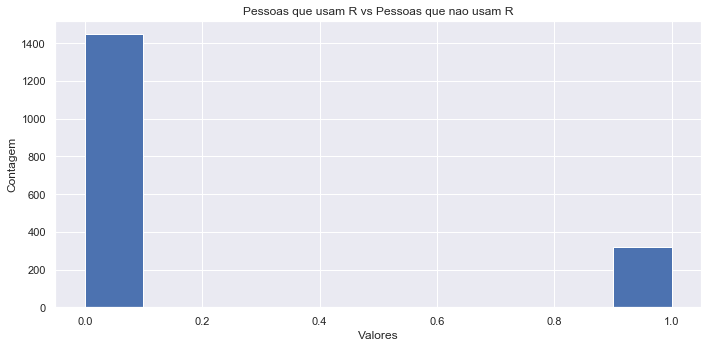

In [250]:
# Plot
fig, ax = plot.subplots(figsize = (10,5))

ax.hist(r_language)
ax.set_xlabel("Valores")
ax.set_ylabel("Contagem")
ax.set_title("Participantes que não usam R vs Pessoas que usam R")

fig.tight_layout()
plot.show()

In [142]:
python_language = data.iloc[:,37]
python_language.head()

0    0
1    1
2    1
3    1
4    1
Name: ('P21', 'python'), dtype: int64

In [146]:
# Valores Missing
python_language.isnull().sum()

0

In [175]:
nao_usuarios_python = []
usuarios_python = []
for valor in list(python_language):
    if valor == 1:
        usuarios_python.append(valor)
    else:
        nao_usuarios_python.append(valor)

In [177]:
# Porcentegem de entrevistados que usam Python
pythonPercent1 = (len(usuarios_python) / (python_language.count())) * 100
print("Porcentagem de Pessoas que utilizam Python:", round(pythonPercent1), "%")

Porcentagem de Pessoas que utilizam Python: 44.0 %


In [179]:
# Porcentegem de entrevistados que nao usam Python
pythonPercent2 = (len(nao_usuarios_python) / (python_language.count())) * 100
print("Porcentagem de Pessoas que não utilizam Python:", round(pythonPercent2), "%")

Porcentagem de Pessoas que não utilizam Python: 56.0 %


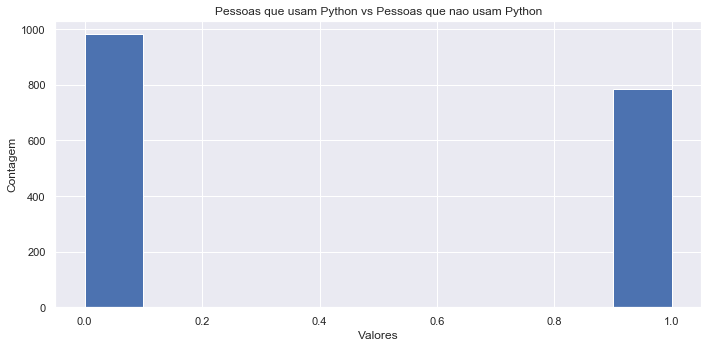

In [239]:
# Plot
fig, ax = plot.subplots(figsize = (10,5))

ax.hist(python_language)
ax.set_xlabel("Valores")
ax.set_ylabel("Contagem")
ax.set_title("Participantes que usam Python vs Pessoas que nao usam Python")

fig.tight_layout()
plot.show()